In [7]:
import pandas as pd
import prophet as Prophet
from app import db, DTSchool

In [18]:
course = 'Bachelor of Science in Accountancy'
tuition_fee = '41000 - 60000'
location = 'Brgy. III'

be_course = {
    'Bachelor of Science in Accountancy': 'hd-accountancy.csv'
}

school_data = pd.read_sql_query(db.session.query(DTSchool).filter(
    (DTSchool.Course == course) & (DTSchool.Tuition_Fee == tuition_fee) | (DTSchool.Location == location)
).statement, db.session.bind)

# Convert the integer labels back into the original string labels
recommended_schools = school_data['School'].tolist()
recommended_schools

["Calamba Doctor's College",
 'Colegio de San Juan de Letran',
 'Laguna College Of Business And Arts',
 'Lyceum of the Philippines University',
 'University of Perpetual Help System Dalta']

In [19]:
df = pd.read_csv(be_course[course])

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

df

,Time Date,School,Course,Passing Rate,Year,Month,Day,ds
0,31122010,AMA Computer College,Bachelor of Science in Accountancy,18.75,2010,12,31,2010-12-31
1,30122011,AMA Computer College,Bachelor of Science in Accountancy,50.00,2011,12,30,2011-12-30
2,31122011,AMA Computer College,Bachelor of Science in Accountancy,19.05,2011,12,31,2011-12-31
3,30122012,AMA Computer College,Bachelor of Science in Accountancy,0.00,2012,12,30,2012-12-30
4,31122012,AMA Computer College,Bachelor of Science in Accountancy,24.32,2012,12,31,2012-12-31
...,...,...,...,...,...,...,...,...
139,31122018,Saint John Colleges,Bachelor of Science in Accountancy,4.17,2018,12,31,2018-12-31
140,30122019,Saint John Colleges,Bachelor of Science in Accountancy,10.53,2019,12,30,2019-12-30
141,31122019,Saint John Colleges,Bachelor of Science in Accountancy,8.57,2019,12,31,2019-12-31
142,31122021,Saint John Colleges,Bachelor of Science in Accountancy,0.00,2021,12,31,2021-12-31


In [29]:
df = pd.read_csv('hd-accountancy.csv')

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

Schools = ["Calamba Doctor's College",
 'Colegio de San Juan de Letran',
 'Laguna College Of Business And Arts',
 'Lyceum of the Philippines University',
 'University of Perpetual Help System Dalta']
for school in recommended_schools:
    df_school = df[df['School'] == school]
    df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
    df_school.columns = ['y', 'ds']

    m = Prophet.Prophet(interval_width=0.95)
    m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
    m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
    _model = m.fit(df_school)

    # Get the latest date in the original data frame
    latest_date = df_school['ds'].max()

    # Get the range of dates for the future data frame
    start_date = latest_date - pd.DateOffset(years=5)
    end_date = latest_date + pd.DateOffset(years=5)
    future_dates = pd.date_range(start_date, end_date, freq='Y')

    # Create the future data frame
    _future = pd.DataFrame({'ds': future_dates})

    # Get predictions for those specific dates
    _forecast = m.predict(_future)
    _forecast['yhat'] = _forecast['yhat'].clip(lower=0, upper=100).round()
    yhat_values = _forecast['yhat'].tolist()


C:\Users\wowha\AppData\Local\Temp\ipykernel_14268\77829973.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
19:09:37 - cmdstanpy - INFO - Chain [1] start processing
19:09:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wowha\AppData\Local\Temp\ipykernel_14268\77829973.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
19:09:38 - cmdstanpy - INFO - Chain [1] start processing
19:09:38 - cmdstanpy - INFO - Chain [1] 

In [60]:
course = 'Bachelor of Science in Accountancy'
tuition_fee = '41000 - 60000'
location = 'Laguna'
be_course = {
    'Bachelor of Science in Accountancy': 'hd-accountancy.csv'
}

school_data = pd.read_sql_query(db.session.query(DTSchool).filter(
    (DTSchool.Course == course) & (DTSchool.Tuition_Fee == tuition_fee) & (DTSchool.Location == location)
).statement, db.session.bind)
schools = school_data['School']

df = pd.read_csv(be_course[course])

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])
all_yhat_values = []
for school in schools:
    df_school = df[df['School'] == school]
    df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
    df_school.columns = ['y', 'ds']

    m = Prophet.Prophet(interval_width=0.95)
    m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
    m.add_seasonality(name='semi-annual', period=365.25 / 2, fourier_order=10)
    _model = m.fit(df_school)

    # Get the latest date in the original data frame
    latest_date = df_school['ds'].max()

    # Get the range of dates for the future data frame
    start_date = latest_date - pd.DateOffset(years=5)
    end_date = latest_date + pd.DateOffset(years=5)
    future_dates = pd.date_range(start_date, end_date, freq='Y')

    # Create the future data frame
    _future = pd.DataFrame({'ds': future_dates})

    # Get predictions for those specific dates
    _forecast = m.predict(_future)
    _forecast['yhat'] = _forecast['yhat'].clip(lower=0, upper=100).round()
    yhat_values = _forecast['yhat'].tolist()
    all_yhat_values.append(yhat_values)

C:\Users\wowha\AppData\Local\Temp\ipykernel_14268\3456732180.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
21:06:35 - cmdstanpy - INFO - Chain [1] start processing
21:06:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wowha\AppData\Local\Temp\ipykernel_14268\3456732180.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
21:06:37 - cmdstanpy - INFO - Chain [1] start processing
21:06:37 - cmdstanpy - INFO - Chain 

In [47]:
school_profiles = []
for i, school in enumerate(schools):
    school_profile = DTSchool.query.filter_by(School=school).first()
    if school_profile:
        school_profiles.append({
            'School': school_profile.School,
            'Tuition_Fee': school_profile.Tuition_Fee,
            'yhat_values': all_yhat_values[i]
        })

In [72]:
school_profiles

[{'School': "Calamba Doctor's College",
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [31.0, 33.0, 46.0, 26.0, 22.0, 41.0, 61.0, 68.0, 21.0, 8.0]},
 {'School': 'Colegio de San Juan de Letran',
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [67.0,
   24.0,
   15.0,
   41.0,
   29.0,
   39.0,
   83.0,
   4.0,
   10.0,
   61.0,
   46.0]},
 {'School': 'Laguna College Of Business And Arts',
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [22.0, 24.0, 20.0, 0.0, 10.0, 23.0, 0.0, 0.0, 5.0, 0.0, 0.0]},
 {'School': 'Lyceum of the Philippines University',
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [0.0, 12.0, 12.0, 0.0, 21.0, 2.0, 0.0, 6.0, 6.0, 1.0, 21.0]},
 {'School': 'University of Perpetual Help System Dalta',
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [10.0, 0.0, 0.0, 6.0, 0.0, 0.0, 2.0, 0.0, 8.0, 0.0, 0.0]}]

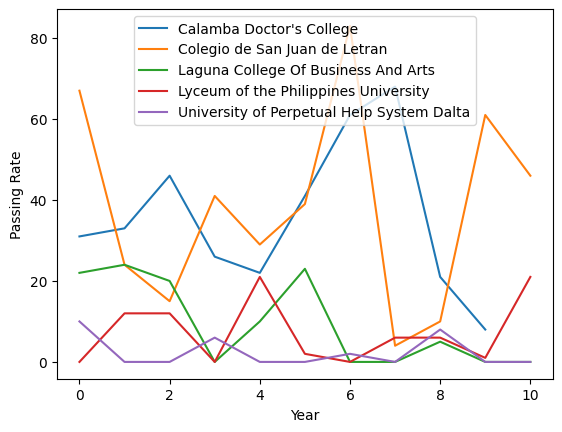

In [66]:
import matplotlib.pyplot as plt

for profile in school_profiles:
    school = profile['School']
    yhat_values = profile['yhat_values']

    # create the x-axis values
    x = range(len(yhat_values))

    # plot the line chart
    plt.plot(x, yhat_values, label=school)
    plt.xlabel('Year')
    plt.ylabel('Passing Rate')
    # plt.title('Tuition fee prediction for {}'.format(school))
    plt.legend()

# show the plot
plt.show()

In [71]:
import matplotlib.pyplot as plt
import numpy as np

for profile in school_profiles:
    school = profile['School']
    yhat_values = profile['yhat_values']

    # create the x-axis values
    current_year = pd.datetime.now().year
    x = (range(current_year - pd.DateOffset(years=5), current_year + len(yhat_values) + pd.DateOffset(years=5)))

    # plot the line chart
    plt.plot(x, yhat_values, label=school)
    plt.xlabel('Year')
    plt.ylabel('Tuition Fee')
    plt.title('Tuition fee prediction for {}'.format(school))
    plt.legend()

# show the plot
plt.show()


C:\Users\wowha\AppData\Local\Temp\ipykernel_14268\2752674758.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  current_year = pd.datetime.now().year


TypeError: unsupported operand type(s) for -: 'int' and 'DateOffset'